* ## **Import tools and primary data**

In [22]:
import pandas as pd
df1 = pd.read_csv("usagers.csv")
df2 = pd.read_csv("vehicules.csv")
df3 = pd.read_csv("caract.csv")
df4 = pd.read_csv("lieux.csv")
print('Done')

Done


* ## **Merge original data**

In [23]:
data = df1.merge(df2, on = ['id_vehicule', 'Num_Acc', 'num_veh'])
data = data.merge(df3, on = 'Num_Acc')
data = data.merge(df4, on = 'Num_Acc')
print('Done')

Done


* ## **Missing values handling**

+ ### Dropping variables

In [24]:
# count nan values
nan_values = data.isna().sum()
# percentage of nan values ay column
nan_values = nan_values.sort_values(ascending=False) *100 / data.shape[0]
# columns with nan values greater than 20%
nan_values = nan_values.loc[nan_values > 20]
nan_values

long       100.000000
lartpc      99.648811
larrout     99.375080
occutc      98.587726
v2          92.673921
dtype: float64

In [25]:
# Copy of original data
df = data.copy()
# Drop nan_values criteria columns
df = df.drop(nan_values.to_dict().keys(), axis=1)
# Drop other column not concerned or not making sens in the process
df = df.drop(['lat','secu1', 'secu2', 'secu3'], axis=1)

print('Dimension : {}'.format(df.shape))

Dimension : (132977, 45)


In [26]:
#  df.rename(columns={'catu': 'cat_usagers', 
#                     'grav': 'gravite',
#                     'obs' : 'obs_fixe',
#                     'obsm' : 'obs_mobile'
                    
#                     }, 
#            inplace=True)

* ### Dropping rows

In [27]:
# Drop rows with any cells with nan values
df = df.dropna(axis=0, how='any')
print('Dimension : {}'.format(df.shape))

Dimension : (104994, 45)


===============================================================================

In [28]:
# convert sexe as categorical
# df.sexe = df.sexe.astype('category')
# df.sexe.dtypes

In [29]:
# variance 
df.var().sort_values().head()

an      5.169928e-26
v1      2.015286e-02
agg     2.138907e-01
sexe    2.175298e-01
prof    2.859882e-01
dtype: float64

In [30]:
# dropping `an` variable
df = df.drop('an', axis=1)

In [31]:
# # Find the high correlated variables (> 60% in our case)
# c = df.corr().abs()
# s = c.unstack()
# so = s.sort_values(ascending=True)
# so = so[so > .6]
# print(so[so != 1])

In [32]:
# # Dropping the high correlated varialbles, priority to these with less categories
# df = df.drop(['locp', 'vma', 'etatp', 'place'], axis=1)
# print('Done')

In [33]:
# c = df.corr().abs()
# s = c.unstack()
# so = s.sort_values(ascending=False)
# so[so !=1]

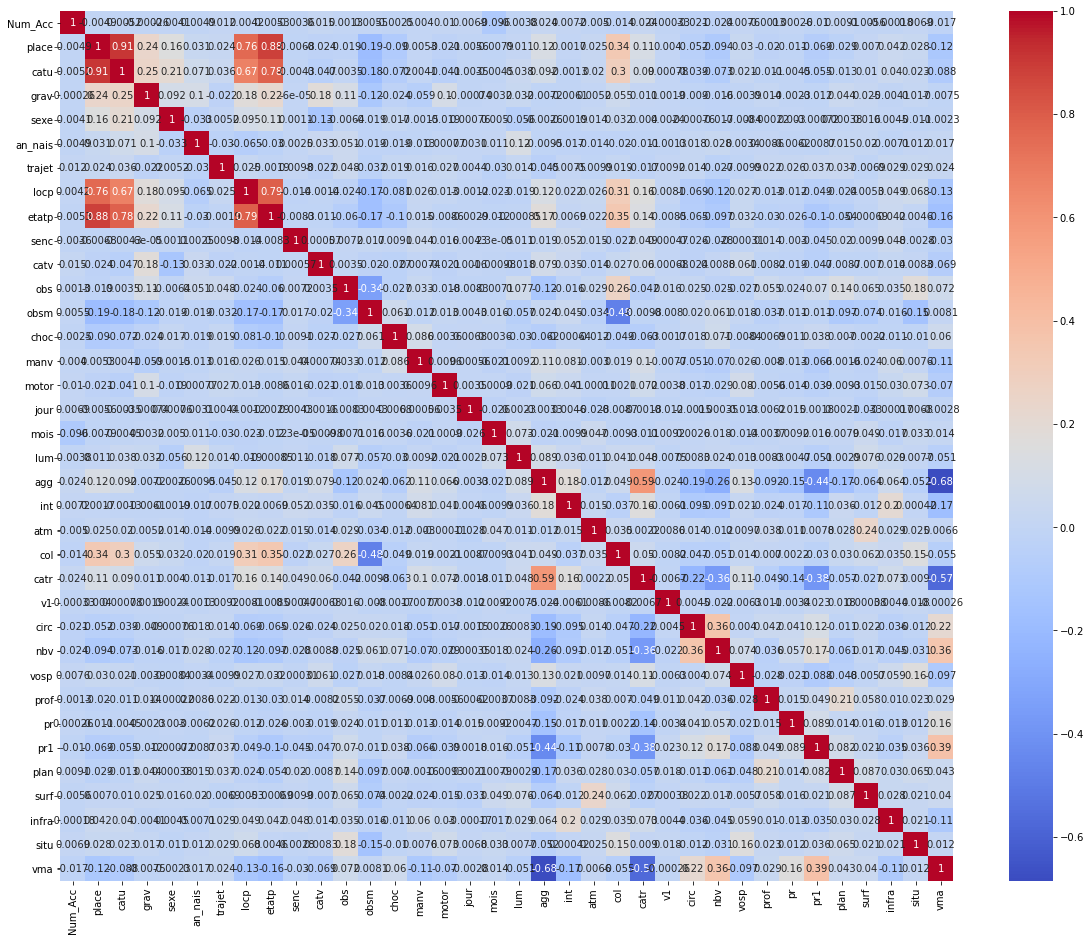

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

# gestion des modalites 

### - variables conversion in cat type

In [38]:
df.columns

Index(['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'locp', 'actp', 'etatp', 'senc', 'catv', 'obs',
       'obsm', 'choc', 'manv', 'motor', 'jour', 'mois', 'hrmn', 'lum', 'dep',
       'com', 'agg', 'int', 'atm', 'col', 'adr', 'catr', 'voie', 'v1', 'circ',
       'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'surf', 'infra', 'situ',
       'vma'],
      dtype='object')

In [35]:
cat = ['lum', 'agg', 'int', 'atm', 'col',
        'catr', 'circ', 'vosp', 'prof', 
       'plan', 'surf', 'infra', 'situ', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 
       'catu', 'sexe', 'trajet', 'actp']

df1 = df.copy()

df1[cat] = df1[cat].astype('category')

df1.select_dtypes(exclude=['category']).columns

drop = ['an_nais', 'motor', 
      'jour', 'mois', 'hrmn', 'dep', 
      'com', 'adr', 'voie', 'v1',
      'nbv', 'pr', 'pr1',
      'Num_Acc', 'id_vehicule', 'num_veh']

df1 = df1.drop(drop, axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104994 entries, 0 to 132976
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   place   104994 non-null  int64   
 1   catu    104994 non-null  category
 2   grav    104994 non-null  int64   
 3   sexe    104994 non-null  category
 4   trajet  104994 non-null  category
 5   locp    104994 non-null  int64   
 6   actp    104994 non-null  category
 7   etatp   104994 non-null  int64   
 8   senc    104994 non-null  category
 9   catv    104994 non-null  category
 10  obs     104994 non-null  category
 11  obsm    104994 non-null  category
 12  choc    104994 non-null  category
 13  manv    104994 non-null  category
 14  lum     104994 non-null  category
 15  agg     104994 non-null  category
 16  int     104994 non-null  category
 17  atm     104994 non-null  category
 18  col     104994 non-null  category
 19  catr    104994 non-null  category
 20  circ    104994 non-null  c

### - Reduction of categories in some variables

In [36]:
# on remplace ces observations par la modalite 9 = AUTRE
df1.trajet.loc[(df1.trajet == -1) | (df1.trajet == 0)] = 9

# action du pieton
df1.actp.loc[(df1.actp == '-1') | (df1.actp == '0') | (df1.actp == 'A') | (df1.actp == 'B')] = '9'

# obstacle de mobilite
df1.obsm.loc[(df1.obsm == -1) | (df1.obsm == 0)] = 9

# sens de la circulation
df1.circ.loc[df1.circ == -1] = 1

print("Done")

Done


### - Sampling problem handling (Improper balance of the data)

In [37]:
df1.shape

(104994, 28)

In [14]:
df1.grav.value_counts()

4    45516
1    44777
3    12751
2     1950
Name: grav, dtype: int64

Labels : 
    <li>1 - Indemne </li>
    <li>2 - Tué</li>
    <li>3 - Blessé hospitalisé</li>
    <li>4 - Blessé léger</li>

<!-- We are going to merge the categories `2` and `3` and  considered these observations as people who need `serious and urgent medical attention` or `dead`. -->

In [15]:
df1.grav.replace(3, 2, inplace=True)
df1.grav.replace(4, 1, inplace=True)
# df1.grav.value_counts(normalize = True)
# df1.loc[df1.grav == 3] = 2
# df1.loc[df1.grav == 4] = 1
df1.grav.value_counts(normalize = True)

1    0.859982
2    0.140018
Name: grav, dtype: float64

In [16]:
y = df1.grav
X = df1.drop(columns='grav')

In [17]:
df1.grav.unique()

array([1, 2], dtype=int64)

<span style = 'color : red'>===================================================================</span>

In [20]:
# Install imblear
# !pip install imblearn

In [18]:
# import library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({1: 90293, 2: 14701})
Resample dataset shape Counter({1: 14701, 2: 14701})


In [19]:
import numpy as np
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [20]:
# hot encoding of the features
X_data = pd.get_dummies(X_rus.astype(str))

# Normalizing the data
X_N_data = normalize(X_data.values)

y = y_rus
# Splitting the data for training and test purpose
X_train, X_test, y_train, y_test = train_test_split(X_N_data, y, random_state=42, test_size= .3)


<span style = 'color : red'>===================================================================<span>

# Logistic regression

In [24]:
# Importation du module
from sklearn.linear_model import LogisticRegression
# Entrainnement du modèle
logreg = LogisticRegression()


In [25]:
model_reg = logreg.fit(X_train, y_train)

In [26]:
model_reg_score = model_reg.score(X_test, y_test)
print('Base Regression Model Score : {:04.3f}'.format(model_reg_score))

Base Regression Model Score : 0.766


<span style = 'color : yellow'>===================================================================<span>

<span style = 'color : yellow'>===================================================================<span>

In [27]:
# Predictions (test set)
predictions_test_reg = model_reg.predict(X_test)



              precision    recall  f1-score   support

           1      0.779     0.744     0.761      4422
           2      0.754     0.788     0.771      4399

    accuracy                          0.766      8821
   macro avg      0.766     0.766     0.766      8821
weighted avg      0.766     0.766     0.766      8821



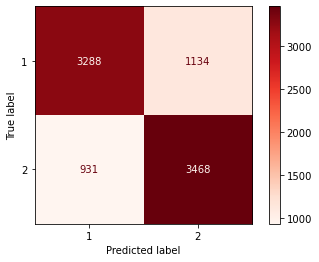

In [28]:
from sklearn.metrics import classification_report, plot_confusion_matrix
disp = plot_confusion_matrix(model_reg, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d'
                             )
print("")
print(classification_report(y_test, 
                            predictions_test_reg, 
                            digits=3, 
                            zero_division = 1
                            )
      )

# Hyperparameters tuning

In [29]:
# Look at parameters used by our current base forest
print('Parameters currently in use :')
pprint(model_reg.get_params())

Parameters currently in use :
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'penalty' : ["l2"],
        'C' : np.logspace(-4, 5, 5),
        'solver': ['newton-cg']
    }
]

In [31]:
grid_reg = GridSearchCV(model_reg, 
                       param_grid, 
                       cv = 3
                       )

In [32]:
# Entrainnement du modèle optimisé
best_grid_reg = grid_reg.fit(X_train, y_train)

In [33]:
# Présentation des paramètres du modèle optimal
print("Parmètres optimisés : ",best_grid_reg.best_params_)

Parmètres optimisés :  {'C': 3.1622776601683795, 'penalty': 'l2', 'solver': 'newton-cg'}


In [34]:
best_reg_model = best_grid_reg.best_estimator_
best_reg_pred = best_reg_model.predict(X_test)

              precision    recall  f1-score   support

           1      0.781     0.736     0.758      4422
           2      0.749     0.793     0.770      4399

    accuracy                          0.764      8821
   macro avg      0.765     0.764     0.764      8821
weighted avg      0.765     0.764     0.764      8821



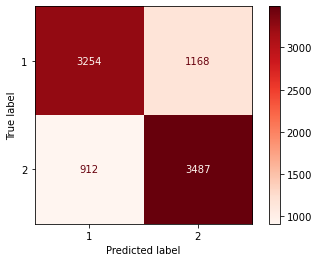

In [35]:
print(classification_report(y_test, 
                            best_reg_pred, 
                            digits = 3, 
                            zero_division = 1
                            )
      )
disp = plot_confusion_matrix(best_reg_model, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d'
                             )

<span style = 'color : red'>===================================================================<span>

#### Model selection, trainning and predictions

# Random forest

In [36]:
# Default Random forest
rf = RandomForestClassifier(random_state=42)

# fitting 
model_rf = rf.fit(X_train, y_train)

# Predictions (test)
predictions_test = model_rf.predict(X_test)


In [37]:

print('Trainning accuracy : {:04.3f}'.format(model_rf.score(X_train, y_train)))
print('Test accuracy  : {:04.3f}'.format(model_rf.score(X_test, y_test)))

Trainning accuracy : 0.998
Test accuracy  : 0.789


              precision    recall  f1-score   support

           1      0.802     0.769     0.785      4422
           2      0.777     0.809     0.793      4399

    accuracy                          0.789      8821
   macro avg      0.789     0.789     0.789      8821
weighted avg      0.789     0.789     0.789      8821



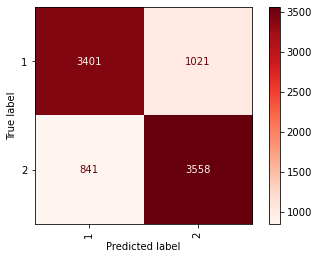

In [38]:
from sklearn.metrics import plot_confusion_matrix, classification_report
# labels_disp = ["Indemne", "Tué", "Hospitalisé", "Blessé léger"]
print(classification_report(y_test, predictions_test, digits=3, zero_division = 1, 
                            # target_names = labels_disp
                            )),
disp = plot_confusion_matrix(model_rf, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d',
                            #  display_labels=labels_disp,
                             xticks_rotation= 'vertical'
                             )

# Hyperarameters tuning for Random Forest

In [39]:
# Look at parameters used by our current base forest
print('Parameters currently in use :')
pprint(model_rf.get_params())

Parameters currently in use :
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'max_depth': [10],
    # 'min_samples_leaf': [1, 2],
    # 'min_samples_split': [1, 2],
    'n_estimators': [200, 300, 500]
}

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = model_rf, 
                           param_grid = param_grid,
                           cv = 5, n_jobs=-1)

In [102]:
# Fit the grid search to the data
best_rf_grid = rf_grid.fit(X_train, y_train)

In [103]:
print('Ramdom Forest model best parameters :')
pprint(best_rf_grid.best_params_)

Ramdom Forest model best parameters :
{'n_estimators': 300}


In [104]:
best_rf_model = best_rf_grid.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

In [105]:

print('Accuracy on test set (model_rf) : {:04.3f}'.format(best_rf_model.score(X_test, y_test)))

Accuracy on test set (model_rf) : 0.789


              precision    recall  f1-score   support

           1      0.806     0.764     0.784      4422
           2      0.775     0.815     0.794      4399

    accuracy                          0.789      8821
   macro avg      0.790     0.789     0.789      8821
weighted avg      0.790     0.789     0.789      8821



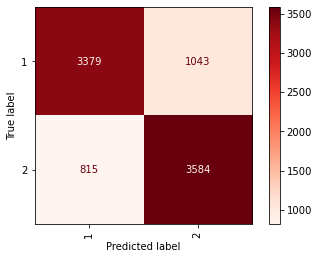

In [106]:
print(classification_report(y_test, best_rf_pred, 
                            digits=3, zero_division = 1, 
                            # target_names = labels_disp
                            ))

disp = plot_confusion_matrix(best_rf_model, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d',
                            #  display_labels=labels_disp,
                             xticks_rotation='vertical')

# Extreme Gradient Boosting

In [61]:
# On redécoupe la base en train/test

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_N_data, y, random_state=42, test_size=.3)


# On crée le modèle :

xgb = GradientBoostingClassifier()

model_xgb = xgb.fit(X_train_xgb, y_train_xgb)
print("Done")

Done


In [62]:

# On calcul les prédictions
predictions_test_xgb = model_xgb.predict(X_test_xgb)
predictions_train_xgb = model_xgb.predict(X_train_xgb)


In [63]:
print('Accuracy on test set : {:04.3f}'.format(model_xgb.score(X_test_xgb, y_test_xgb)))

train_acc = accuracy_score(y_train_xgb, predictions_train_xgb)
print('Accuracy on train set : {:04.3f}'.format(train_acc))

Accuracy on test set : 0.768
Accuracy on train set : 0.773


              precision    recall  f1-score   support

           1      0.790     0.733     0.760      4422
           2      0.750     0.804     0.776      4399

    accuracy                          0.768      8821
   macro avg      0.770     0.768     0.768      8821
weighted avg      0.770     0.768     0.768      8821



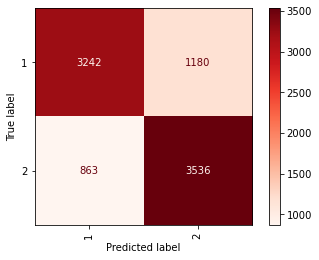

In [64]:
print(classification_report(y_test_xgb, predictions_test_xgb, digits=3, 
# target_names=labels_disp
))
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model_xgb, X_test_xgb, y_test_xgb, 
                             cmap='Reds', values_format='d', 
                            #  display_labels=labels_disp,
                             xticks_rotation= 'vertical')

# Hyperparameter tuning

In [65]:

param_grid = {
    'max_depth' : [3, 4],
    'n_estimators' : [50, 70],
    'min_samples_leaf' : [2, 3]
}

# Instantiate the grid search model

xgb_grid = GridSearchCV(estimator = model_xgb, 
                           param_grid = param_grid,
                           cv = 2, n_jobs=-1)

In [66]:
best_xgb_model = xgb_grid.fit(X_train_xgb, y_train_xgb)

In [67]:

best_xgb_model.best_estimator_

GradientBoostingClassifier(max_depth=4, min_samples_leaf=3, n_estimators=70)

In [68]:

print('Accuracy on test set : {:04.3f}'.format(best_xgb_model.score(X_test_xgb, y_test_xgb)))

Accuracy on test set : 0.772


# Questions
## 1. Comment les modalites avec les petites representations vont affecter le modele?
## 2. Quels sont les algos de classifications qu'on peut encore essayer pour ameliorer?
## 3. Prisen en comptes des suggestions se l'article, comment s'y prendre? (https://larevueia.fr/xgboost-vs-random-forest-predire-la-gravite-dun-accident-de-la-route/)
## 4. Suggestions?

### Créer notre SVM dans sklearn en créant un objet SVC (support vector classificator).

In [33]:
##### Création de notre modèle SVM

In [69]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = \
    train_test_split(X_N_data, y,
                     test_size=0.3)

In [70]:
print(len(X_train_SVM),' samples in training data\n',
      len(X_test_SVM),' samples in test data\n', )

20581  samples in training data
 8821  samples in test data



In [71]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42) # kernel linéaire
classifier.fit(X_train_SVM, y_train_SVM)

SVC(kernel='linear', random_state=42)

# Faire la prédiction

In [72]:
y_pred1 = classifier.predict(X_test_SVM)

In [ ]:
# Evaluer le modèle

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_SVM, y_pred1))
print(classification_report(y_test_SVM, y_pred1))

[[3109 1307]
 [ 738 3667]]
              precision    recall  f1-score   support

           1       0.81      0.70      0.75      4416
           2       0.74      0.83      0.78      4405

    accuracy                           0.77      8821
   macro avg       0.77      0.77      0.77      8821
weighted avg       0.77      0.77      0.77      8821



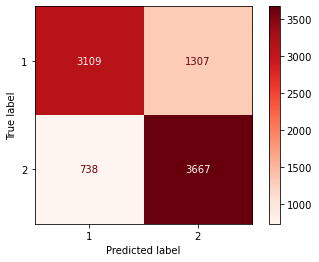

In [74]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test_SVM, y_test_SVM, 
                             cmap='Reds', values_format='d', 
                            #  display_labels=["Indemne", "Tué", "Blessé hospitalisé", "Blessé léger"]
                             )

# KNN

In [75]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn= train_test_split(X_N_data, y, random_state=42, test_size=.3)

In [76]:
print(len(X_train_knn),' samples in training data\n',
      len(X_test_knn),' samples in test data\n', )

20581  samples in training data
 8821  samples in test data



In [77]:
# Learning
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # définition de l'estimateur
model_knn = knn.fit(X_train_knn, y_train_knn) # apprentissage (estimation du modèle)

In [78]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [79]:
print('Base KNN accuracy :{:04.3f}'.format(model_knn.score(X_test_knn, y_test_knn)))


Base KNN accuracy :0.740


In [81]:
knn_pred = model_knn.predict(X_test_knn)
print(classification_report(y_test_knn, 
                            knn_pred, 
                            digits=3, 
                            # target_names=labels_disp
                            ))

              precision    recall  f1-score   support

           1      0.745     0.734     0.739      4422
           2      0.736     0.747     0.742      4399

    accuracy                          0.740      8821
   macro avg      0.740     0.740     0.740      8821
weighted avg      0.740     0.740     0.740      8821



# tuning

In [82]:
param_grid = {
    'n_neighbors': [5, 7, 10]
}

# Instantiate the grid search model

knn_grid = GridSearchCV(estimator = model_knn, 
                           param_grid = param_grid,
                           cv = 2, n_jobs=-1)

In [83]:
best_grid_knn = knn_grid.fit(X_train_knn, y_train_knn)

C:\Users\bsully\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.73781638        nan]
  warnings.warn(


In [84]:
print('Accuracy on test set : {:04.3f}'.format(best_grid_knn.score(X_test_knn, y_test_knn)))


Accuracy on test set : 0.745


# Imporper balanced data
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/